<a href="https://colab.research.google.com/github/Pradhap22/Analyzing-Viewer-Engagement-and-Content-Trends-on-YouTube-A-Text-Data-Approach/blob/main/Text_Data_Analysis_Youtube_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Data  Analysis-Youtube case study**

Domain : **Data Analysis**

**Description:**

This case study explores the methodologies and insights derived from text data analysis of YouTube content and viewer interactions. By leveraging natural language processing (NLP) techniques and data mining tools, the study examines video titles, descriptions, comments, and tags to uncover patterns in viewer engagement and content trends. Key areas of focus include:

**Sentiment Analysis:**

Evaluating viewer sentiments expressed in comments to understand audience perceptions of content.


**Topic Modeling:**

Identifying prevalent themes and topics within video descriptions and titles to discern emerging trends in viewer interests.


**Engagement Metrics**:

Analyzing correlations between textual features (such as title length and keyword usage) and viewer engagement metrics (likes, shares, and comments).


**Competitive Analysis:**

Comparing content strategies among leading channels to identify best practices and areas for improvement.
Through this comprehensive analysis, the case study aims to provide actionable insights for content creators and marketers seeking to optimize their YouTube strategies and enhance viewer engagement.

**Lets we Start!!**



**Step 1: Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Loading the dataset**

In [3]:
dataset=pd.read_csv('/content/UScomment.csv')

In [4]:
dataset.head(5)

,Unnamed: 0,video_id,comment_text,likes,replies
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

,0
Unnamed: 0,0
video_id,0
comment_text,0
likes,0
replies,0


**Step 3:Perform Sentiment Analysis**

**Importing Textblob package:**

In [6]:
!pip install textblob


**why we use textblob package for sentiment analysis?**

TextBlob is a simple and powerful library for processing textual data in Python. It provides a straightforward API for common natural language processing (NLP) tasks, such as sentiment analysis, part-of-speech tagging, noun phrase extraction, translation, and more. It is particularly user-friendly for beginners in text processing and NLP.

In [7]:
from textblob import TextBlob


In [ ]:
dataset.head(5)

,Unnamed: 0,video_id,comment_text,likes,replies
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,4,XpVt6Z1Gjjo,trending 😉,3,0


In [8]:
TextBlob("I've been following you from the start of your").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [9]:
TextBlob("I've been following you from the start of your").sentiment.polarity

0.0

In [10]:
dataset.shape

(1999, 5)

In [15]:
polarity=[]
for comment in dataset['comment_text']:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
    polarity.append(0)

In [16]:
len(polarity)

1999

In [17]:
dataset['polarity']= polarity

In [18]:
dataset.head()

,Unnamed: 0,video_id,comment_text,likes,replies,polarity
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [19]:
filter_1= dataset['polarity']==1
pos_polority=dataset[filter_1]
pos_polority.head()



,Unnamed: 0,video_id,comment_text,likes,replies,polarity
64,64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [20]:
filter_2= dataset['polarity']==-1
Neg_polority=dataset[filter_2]
Neg_polority.head()

,Unnamed: 0,video_id,comment_text,likes,replies,polarity
512,512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


**Step 4:Perform WordCloud Analysis**

**Import Word Cloud Analysis package**

In [21]:
!pip install wordcloud


In [22]:
from wordcloud import WordCloud,STOPWORDS

In [23]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [24]:
type(dataset['comment_text'])

pandas.core.series.Series

In [25]:
tot_postive_comments=' '.join(pos_polority['comment_text'])

In [26]:
Wordcloud= WordCloud(stopwords=set(STOPWORDS)).generate(tot_postive_comments)

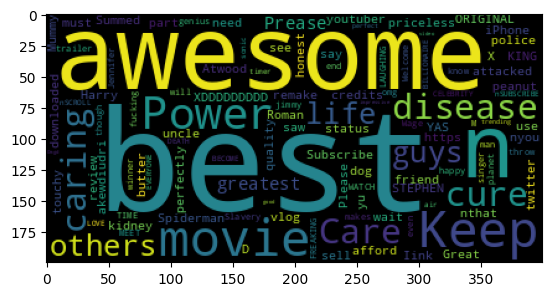

In [27]:
plt.imshow(Wordcloud)
plt.show()

In [30]:
tot_neg_comments=' '.join(Neg_polority['comment_text'])

In [31]:
Wordcloud= WordCloud(stopwords=set(STOPWORDS)).generate(tot_neg_comments)

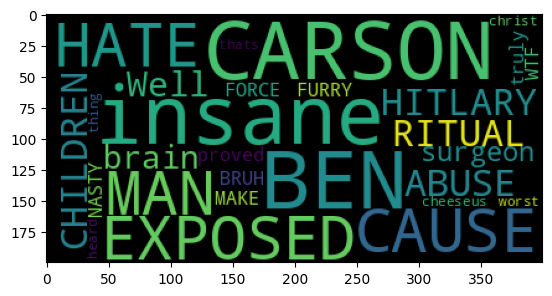

In [32]:
plt.imshow(Wordcloud)
plt.show()

**Step 5:Perform Emoij Analysis**

In [33]:
!pip install emoji==2.2.0



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234910 sha256=7de3982099e01d5a16611a89d4180c9a96dcc9c589fff55afdc518b112cd9481
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [34]:
import emoji

In [35]:
dataset['comment_text'].head()

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉


In [36]:
all_emoji_list=[]
for comment in dataset['comment_text'].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emoji_list.append(char)

In [37]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [38]:
from collections import Counter
Counter(all_emoji_list).most_common(10)

[('😂', 184),
 ('❤', 55),
 ('😍', 35),
 ('😮', 27),
 ('🔥', 21),
 ('👏', 17),
 ('💖', 15),
 ('😆', 14),
 ('😊', 14),
 ('😭', 11)]

In [39]:
freq=[Counter(all_emoji_list).most_common(10)[1][1] for i in range(10)]

In [40]:
freq

[55, 55, 55, 55, 55, 55, 55, 55, 55, 55]

In [41]:
import plotly.graph_objs as go
from plotly.offline import iplot
trace =go.Bar(x=all_emoji_list,y=freq)
data=[trace]
iplot(data)

**Step 5:Collect the Entire data from youtube**

In [42]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')


Mounted at /content/drive


In [43]:
# Define the folder path containing your datasets
folder_path = '/content/drive/MyDrive/Dataset/additional_data'  # Update with your folder name


In [44]:
import os

# List all files in the dataset folder
all_files = os.listdir(folder_path)
print(all_files)


['CAvideos.csv', 'CA_category_id.json', 'DE_category_id.json', 'DEvideos.csv', 'FR_category_id.json', 'FRvideos.csv', 'GB_category_id.json', 'GBvideos.csv', 'IN_category_id.json', 'INvideos.csv', 'JP_category_id.json', 'JPvideos.csv', 'KRvideos.csv', 'KR_category_id.json', 'MX_category_id.json', 'MXvideos.csv', 'RU_category_id.json', 'RUvideos.csv', 'US_category_id.json', 'USvideos.csv', 'additional_data.csv', 'Youtube_analysis.json', 'Youtube_analysis.csv']


In [45]:
files_csv=[file for file in all_files if '.csv'in file]

In [46]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv',
 'additional_data.csv',
 'Youtube_analysis.csv']

In [47]:
full_df=pd.DataFrame()
path=folder_path
for file in files_csv:
  current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',on_bad_lines='skip')
  full_df=pd.concat([full_df,current_df],ignore_index=True)


<ipython-input-47-a91fd7291494>:4: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.



In [48]:
full_df.shape

(823793, 17)

In [49]:
full_df.duplicated().sum()

143147

In [50]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Unnamed: 0'],
      dtype='object')

In [51]:
full_df.drop_duplicates(inplace=True)

In [52]:
full_df.shape

(680646, 17)

In [53]:

full_df[0:1000].to_csv('/content/drive/MyDrive/Dataset/additional_data/Youtube_analysis.csv',index=False)

full_df[0:1000].to_json('/content/drive/MyDrive/Dataset/additional_data/Youtube_analysis.json')

**Step 6:Interact with Database**




In [54]:
from sqlalchemy import create_engine
import os

# Print the current working directory
print(os.getcwd())

# Try a relative path
engine = create_engine('sqlite:///additional_data.sqlite', echo=False)

# If the above fails, construct an absolute path
# and replace /path/to/your/database with the actual path

# engine = create_engine('sqlite:////path/to/your/database/additional_data.sqlite', echo=False)


full_df[0:1001].to_sql('Users', con=engine, if_exists='append', index=False)

/content


1001

In [55]:
!pip install sqlalchemy
from sqlalchemy import create_engine

# Use a relative path instead of an absolute path to the database file.
# This assumes the database file is in the same directory as the notebook.
engine = create_engine('sqlite:///additional_data.sqlite', echo=False)

# Check if the file exists and you have write permissions to it.
# If the file doesn't exist, it will be created.
!ls -l additional_data.sqlite

full_df[0:1000].to_sql('Users', con=engine, if_exists='append', index=False)

-rw-r--r-- 1 root root 1966080 Oct  8 02:59 additional_data.sqlite


1000

**Step 7: Data analysis**

 **Question:01**

**Analysing the most liked category ! in the Dataset**




In [56]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Unnamed: 0'],
      dtype='object')

In [57]:
### we could not find category
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26, 1, 28, 20, 17, 29, 15, 19, 2, 27, 43, 30,
       44, nan, '10', '24', '23', '1', '25', '22', '28', '17', '27', '26',
       '43', '2', '29', '20', '30', '19', '15',
       'https://i.ytimg.com/vi/HN2kgWnF_Vc/default.jpg'], dtype=object)

In [58]:
json_df=pd.read_json('/content/drive/MyDrive/Dataset/additional_data/US_category_id.json')

In [59]:
json_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [60]:
cat_dict={}
for item in json_df['items'].values:
  cat_dict[int(item['id'])]=item['snippet']['title']

In [61]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [62]:
full_df['category_name']=full_df['category_id'].map(cat_dict)

In [71]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Unnamed: 0,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,NaN,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,NaN,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,NaN,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,NaN,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,NaN,Music


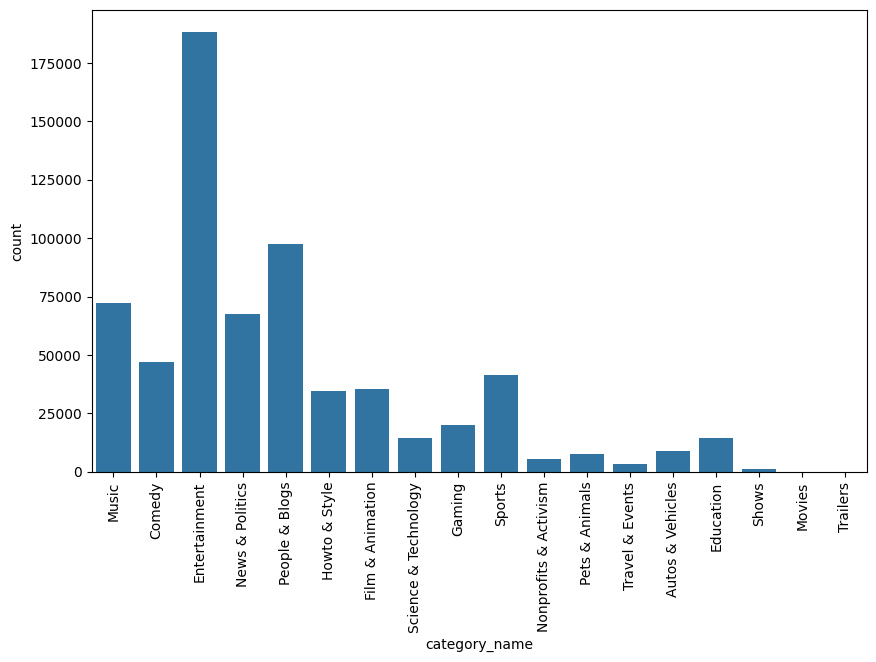

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x='category_name',data=full_df)
plt.xticks(rotation=90)
plt.show()


**Question:02**

**Lets Analyse whether audience is engaged or not?**

In [77]:
full_df['likes_rate']= (full_df['likes']/full_df['views'])*100


full_df['dislikes_rate']= (full_df['dislikes']/full_df['views'])*100


full_df['comments_rate']= (full_df['comment_count']/full_df['views'])*100

In [78]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Unnamed: 0,category_name,likes_rate,dislikes_rate,comments_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,NaN,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,NaN,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,NaN,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,NaN,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,NaN,Music,4.874563,0.062887,0.253752


**Realtionship between views and like:**

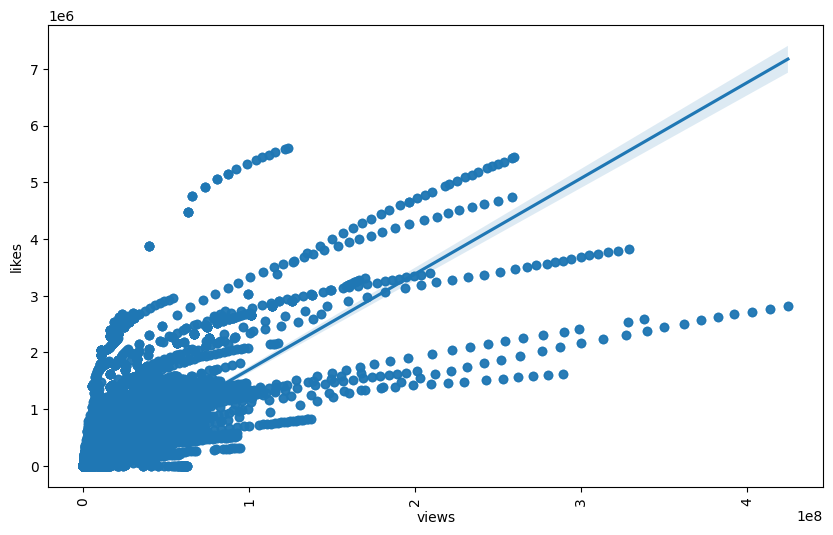

In [79]:
plt.figure(figsize=(10,6))
sns.regplot(x='views',y='likes',data=full_df)
plt.xticks(rotation=90)
plt.show()

**Correaltion between VIEWS LIKES & DISLIKES:**

In [80]:
full_df[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405451
likes,0.779531,1.000000,0.451644
dislikes,0.405451,0.451644,1.000000


**Using HEATMAP:**

<Axes: >

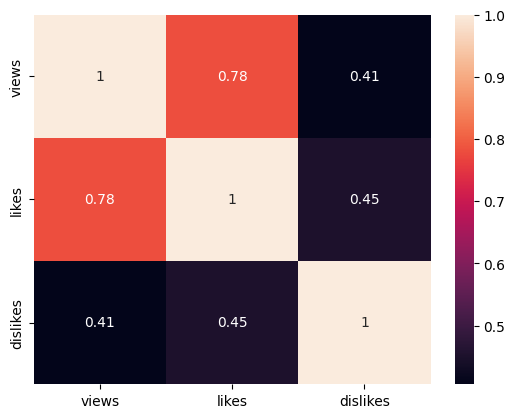

In [81]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)

**Question:03**

**Does Punctuations have an impact on views, likes, dislikes ?**

In [82]:
full_df['channel_title'].value_counts()

,count
channel_title,
The Late Show with Stephen Colbert,1420
WWE,1291
Late Night with Seth Meyers,1189
TheEllenShow,1112
Jimmy Kimmel Live,1061
...,...
Agapito PequeÃÂ±o,1
Katy ÃÂs,1
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ ÐÐ¸Ñ Ð°Ð»ÐºÐ¸Ð½,1


In [83]:
cdf=full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [84]:
cdf= cdf.rename(columns={0:'total_videos'})

In [85]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,1420
1,WWE,1291
2,Late Night with Seth Meyers,1189
3,TheEllenShow,1112
4,Jimmy Kimmel Live,1061
...,...,...
48179,Riche ÃÂ 30 ans,1
48180,Alquimista Tarot AstrolÃ³gico,1
48181,ÐÐ¾Ð»Ð¸ÑÐ¸ÐºÐ° Ð ÐÐ¸ÑÐ°Ñ,1
48182,Riche Ã 30 ans,1


In [86]:
import plotly.express as px

In [87]:
px.bar(cdf[0:20],x='channel_title',y='total_videos')

In [90]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [91]:
import string

In [92]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
len([char for char in full_df['title'][0] if char  in string.punctuation])

4

In [94]:
def count_punct(text):
  return len([char for char in text if char in string.punctuation])

In [99]:
def count_punct(text):
    # Convert the input to string to handle potential non-string values
    text = str(text)
    return len([char for char in text if char in string.punctuation])

full_df['title'].apply(count_punct) # Apply the modified function

,title
0,4
1,1
2,3
3,3
4,3
...,...
823784,3
823785,3
823787,0
823790,8


In [100]:
sample=full_df[0:10000]

In [101]:
sample['count_punct']=sample['title'].apply(count_punct)

<ipython-input-101-8b87fafecca4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
sample['count_punct']

,count_punct
0,4
1,1
2,3
3,3
4,3
...,...
9995,6
9996,0
9997,1
9998,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



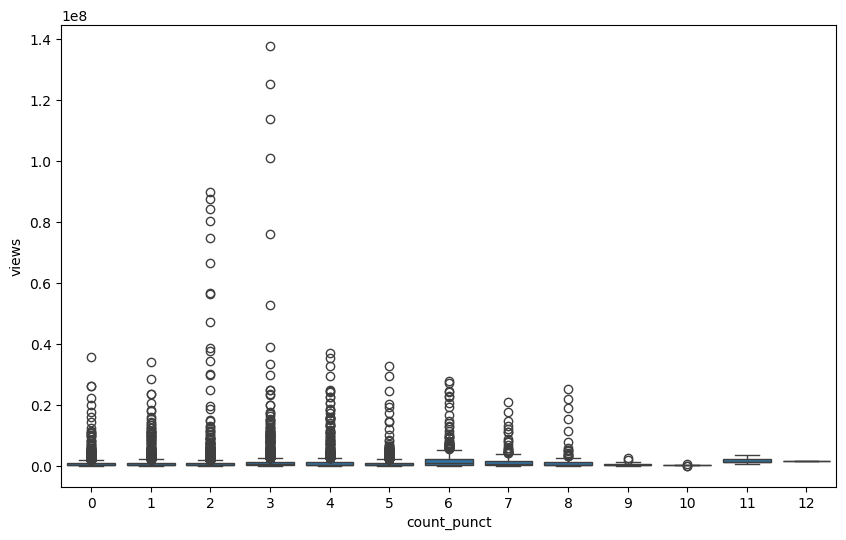

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(x='count_punct',y='views',data=sample)
plt.show()